In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [27]:
TMin, TMax, N = 0.,10., 201
t = np.linspace(TMin, TMax, N)
h = (TMax-TMin)/float(N-1)

In [28]:
##definimos las cndiciones iniciales

r0 = np.array([1.0,0])

In [29]:
##definimos la ecuación diferencial

def GetA(x):
    #return -(np.pi)**2*x
    #Pendulo
    return -x

In [30]:
##creamos el método para resolverla con LeapFrog
def GetLeapFrog(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    t1 = np.arange(TMin - 0.5*h, TMax - 0.5*h + h, h)
    
    x = np.zeros(N)
    v = np.zeros(N) # El inicializador

    x[0] = r0[0]
    v[0] = r0[1] - 0.5*h*GetA(x[0])
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*GetA(x[i-1])
        x[i] = x[i-1] + h*v[i]
    
    # Igualando los array
    X = np.array([])
    for i in range(len(x)-1):
        X = np.append(X,(x[i]+x[i+1])*0.5)

    V = v[1:]
    
    #print(len(X),len(V))
    
    return X,V

In [31]:
##guardamos los resultados del LeapFrog
x, v = GetLeapFrog(r0,t)
K=(1/2)*(v**2)
U=(1/2)*(x**2)
E_t=K+U

In [35]:
tiempo=t[1:len(t)]
##tiempo para el yoshida

In [36]:
## definimos los coeficientes
c1=1/(2*(2-(2**(1/3))))
c2=(1-(2**(1/3)))/(2*(2-(2**(1/3))))
c3=(1-(2**(1/3)))/(2*(2-(2**(1/3))))
c4=1/(2*(2-(2**(1/3))))
d1=1/(2-(2**(1/3)))
d2=-(2**(1/3))/(2-(2**(1/3)))
d3=1/(2-(2**(1/3)))
d4=0

In [38]:
##definimos el método de yoshida para solucionar la ecuación

def Yoshida(r0,t):
    
    N = len(t)
    h = t[1] - t[0]
    
    
    x = np.zeros(N)
    v = np.zeros(N) # El inicializador

    x[0] = r0[0]
    v[0] = r0[1] 
    
    for i in range(1,N):
        X1= x[i-1]+c1*v[i-1]*h
        V1= v[i-1]+d1*GetA(X1)*h
        X2= X1+c2*V1*h
        V2= V1+d2*GetA(X2)*h
        X3= X2+c3*V2*h
        V3= V2+d3*GetA(X3)*h
        
        
        v[i] = V3
        x[i] = X3 + c4*V3*h
    
    # Igualando los array
        
    return x,v

In [39]:
##guardamos los resultados del Yoshida
x, v = Yoshida(r0,t)
K=(1/2)*(v**2)
U=(1/2)*(x**2)
E_t1=K+U

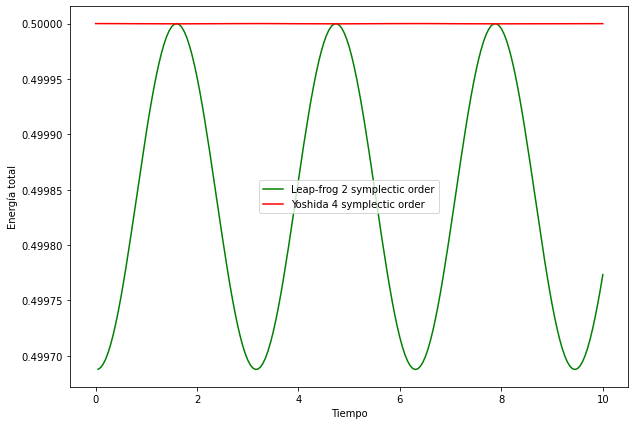

<Figure size 432x288 with 0 Axes>

In [42]:
plt.figure(figsize=[10,7])
plt.plot(tiempo,E_t, label="Leap-frog 2 symplectic order",color="green")
plt.plot(t,E_t1, label="Yoshida 4 symplectic order",color="red")
plt.ylabel("Energía total")
plt.xlabel("Tiempo")
plt.legend()
plt.show()
plt.savefig("Yoshida4JoanFaber")